In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


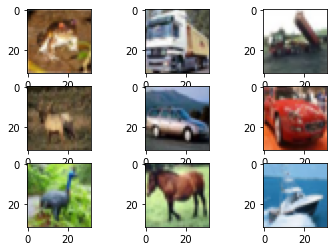

In [3]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
plt.show()

## this was taken from url below to help find code on how to print images
## https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

In [4]:
num_classes=10
img_height=32
img_width=32

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)         

In [64]:
epochs = 10
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 1.5002 - accuracy: 0.4572 - val_loss: 1.2943 - val_accuracy: 0.5360
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 1.1303 - accuracy: 0.6000 - val_loss: 1.0588 - val_accuracy: 0.6308
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.9860 - accuracy: 0.6533 - val_loss: 1.0091 - val_accuracy: 0.6417
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.8904 - accuracy: 0.6901 - val_loss: 0.9219 - val_accuracy: 0.6825
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.8180 - accuracy: 0.7155 - val_loss: 0.8907 - val_accuracy: 0.6942
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.7587 - accuracy: 0.7372 - val_loss: 0.8954 - val_accuracy: 0.6915
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.7012 - accuracy: 0.7531 - val_loss: 0.8671 - val_accuracy: 0.6984
Epoch 

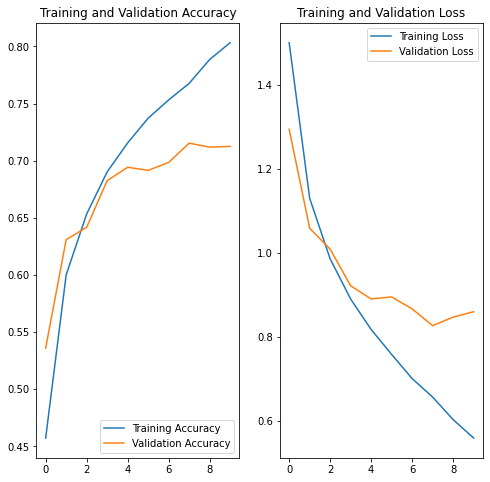

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [6]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [7]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
epochs = 10
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

Epoch 1/10
782/782 [==============================] - 10s 12ms/step - loss: 1.6688 - accuracy: 0.3950 - val_loss: 1.4502 - val_accuracy: 0.4891
Epoch 2/10
782/782 [==============================] - 9s 11ms/step - loss: 1.3762 - accuracy: 0.5040 - val_loss: 1.2024 - val_accuracy: 0.5670
Epoch 3/10
782/782 [==============================] - 9s 11ms/step - loss: 1.2718 - accuracy: 0.5448 - val_loss: 1.1310 - val_accuracy: 0.6008
Epoch 4/10
782/782 [==============================] - 9s 11ms/step - loss: 1.2023 - accuracy: 0.5735 - val_loss: 1.0401 - val_accuracy: 0.6330
Epoch 5/10
782/782 [==============================] - 9s 11ms/step - loss: 1.1521 - accuracy: 0.5928 - val_loss: 1.0389 - val_accuracy: 0.6294
Epoch 6/10
782/782 [==============================] - 9s 11ms/step - loss: 1.1108 - accuracy: 0.6076 - val_loss: 1.0133 - val_accuracy: 0.6441
Epoch 7/10
782/782 [==============================] - 9s 11ms/step - loss: 1.0851 - accuracy: 0.6173 - val_loss: 0.9759 - val_accuracy: 0.656

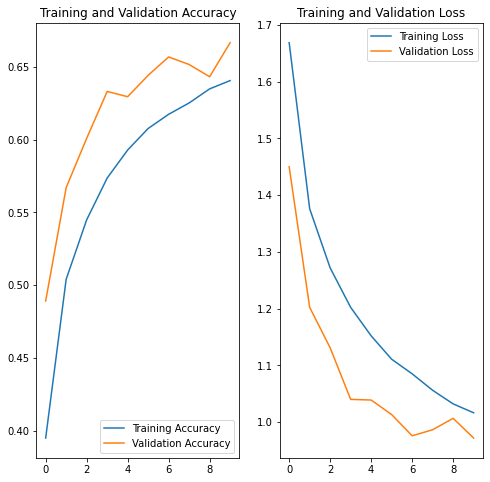

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [85]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
  img = load_image('/content/drive/MyDrive/Colab Notebooks/CS5542 - Big Data/ICP5_DylanFox/deer.png')
  result = model.predict(img)
  score = tf.nn.softmax(result[0])
  print(score)
  print(np.argmax(score))
 
# entry point, run the example
run_example()

tf.Tensor(
[0.1145464  0.00483487 0.158944   0.2540212  0.15500505 0.0302761
 0.02104482 0.20460913 0.05564499 0.00107343], shape=(10,), dtype=float32)
3


In [83]:
sunflower_url = "/content/drive/MyDrive/Colab Notebooks/CS5542 - Big Data/ICP5_DylanFox/deer.png"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
print(score)

This image most likely belongs to truck with a 76.28 percent confidence.
tf.Tensor(
[3.6895212e-03 7.0157610e-02 8.1508909e-04 4.7726259e-03 2.1693597e-03
 7.6593615e-02 6.0989328e-02 1.7651292e-02 4.1041282e-04 7.6275110e-01], shape=(10,), dtype=float32)


In [9]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomZoom(0.3),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
epochs = 15
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

Epoch 1/15
782/782 [==============================] - 41s 11ms/step - loss: 1.8608 - accuracy: 0.3208 - val_loss: 1.6470 - val_accuracy: 0.4047
Epoch 2/15
782/782 [==============================] - 8s 10ms/step - loss: 1.6577 - accuracy: 0.4040 - val_loss: 1.5836 - val_accuracy: 0.4306
Epoch 3/15
782/782 [==============================] - 8s 10ms/step - loss: 1.5802 - accuracy: 0.4303 - val_loss: 1.4540 - val_accuracy: 0.4726
Epoch 4/15
782/782 [==============================] - 8s 10ms/step - loss: 1.5303 - accuracy: 0.4498 - val_loss: 1.4842 - val_accuracy: 0.4710
Epoch 5/15
782/782 [==============================] - 8s 10ms/step - loss: 1.4915 - accuracy: 0.4648 - val_loss: 1.4236 - val_accuracy: 0.4937
Epoch 6/15
782/782 [==============================] - 8s 10ms/step - loss: 1.4544 - accuracy: 0.4768 - val_loss: 1.3914 - val_accuracy: 0.5073
Epoch 7/15
782/782 [==============================] - 8s 10ms/step - loss: 1.4307 - accuracy: 0.4847 - val_loss: 1.3273 - val_accuracy: 0.526

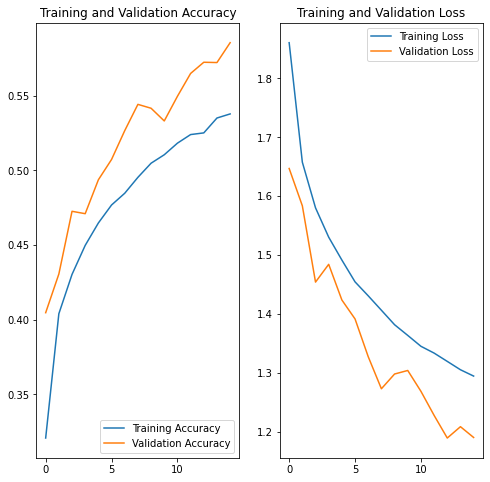

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
  img0 = load_image('/content/drive/MyDrive/Colab Notebooks/CS5542 - Big Data/ICP5_DylanFox/deer.png')
  img1 = load_image('/content/drive/MyDrive/Colab Notebooks/CS5542 - Big Data/ICP5_DylanFox/horse.jpeg')
  img2 = load_image('/content/drive/MyDrive/Colab Notebooks/CS5542 - Big Data/ICP5_DylanFox/plane.jpeg')
  img3 = load_image('/content/drive/MyDrive/Colab Notebooks/CS5542 - Big Data/ICP5_DylanFox/ship.jpeg')
  img4 = load_image('/content/drive/MyDrive/Colab Notebooks/CS5542 - Big Data/ICP5_DylanFox/truck.jpeg')

  result0 = model.predict(img0)
  result1 = model.predict(img1)
  result2 = model.predict(img2)
  result3 = model.predict(img3)
  result4 = model.predict(img4)

  score0 = tf.nn.softmax(result0[0])
  print(score0)
  print(np.argmax(score0))

  score1 = tf.nn.softmax(result1[0])
  print(score1)
  print(np.argmax(score1))

  score2 = tf.nn.softmax(result2[0])
  print(score2)
  print(np.argmax(score2))

  score3 = tf.nn.softmax(result3[0])
  print(score3)
  print(np.argmax(score3))

  score4 = tf.nn.softmax(result4[0])
  print(score4)
  print(np.argmax(score4))
 
# entry point, run the example
run_example()

tf.Tensor(
[0.5227321  0.01879909 0.04748805 0.14887929 0.07964134 0.00348059
 0.02269663 0.04166728 0.11338675 0.00122889], shape=(10,), dtype=float32)
0
tf.Tensor(
[0.5180748  0.01864855 0.04825165 0.15124285 0.08012465 0.00347256
 0.02293026 0.04152617 0.1145024  0.00122605], shape=(10,), dtype=float32)
0
tf.Tensor(
[0.524297   0.01872649 0.04769383 0.14627905 0.08049628 0.00343444
 0.02240936 0.04154612 0.11389076 0.00122668], shape=(10,), dtype=float32)
0
tf.Tensor(
[0.5244664  0.01914947 0.04807405 0.14723974 0.07724854 0.00345543
 0.0230991  0.04073848 0.11527147 0.00125734], shape=(10,), dtype=float32)
0
tf.Tensor(
[0.5220937  0.01898487 0.04808917 0.14854605 0.07841536 0.0034546
 0.02288015 0.04121391 0.11508457 0.00123752], shape=(10,), dtype=float32)
0


In [17]:
model.save("model1_flower_10epoch.h5")